In [1]:
# Chips

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

def science_plot(fontsize = 11):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()



51.78745145616349


<Figure size 600x600 with 0 Axes>

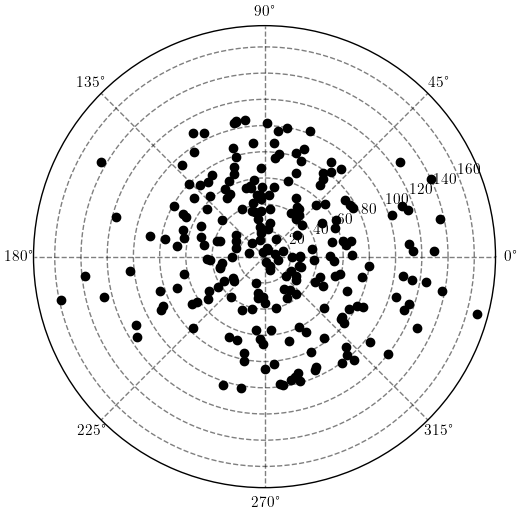

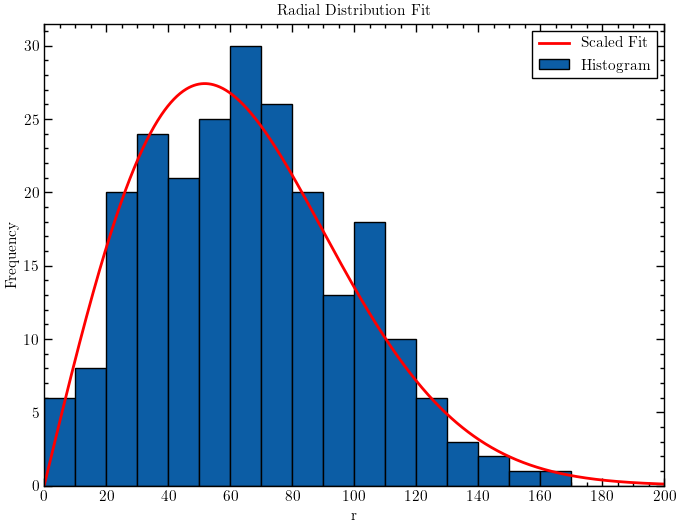

In [61]:
target_path = r"C:\Users\verci\Documents\Python Code\Physics157\CH1\targets.csv"
target_file = pd.read_csv(target_path, sep = ',')
# target_file = target_file.dropna()
# print(target_file)
# bins = target_file['bins']
# freqs = target_file['freqs']
theta = target_file['theta']
r = target_file['r']

x = r*np.cos(theta)
y = r*np.sin(theta)
std_ave = np.sqrt((np.std(x)**2 +np.std(y)**2)/2)
print(std_ave)
# Scatter_diagram
plt.figure(figsize=(6,6))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.radians(theta), r, color = 'k')
# ax.legend()
plt.show()

# # Normal_dist_histogram
# binning = np.arange(0,210, 10)
# plt.figure(figsize=(6,6))
# plt.hist(r, binning, edgecolor = 'k')
# plt.xlim(0,200)
# plt.show()


# Radial_histogram
# Step 4: Compute histogram of r
bin_edges = np.linspace(0, 200, 21)  # 50 bins from 0 to 5
heights, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
bin_width = bins[1] - bins[0]
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Step 5: Define the theoretical function f(r) = (r / sigma^2) * exp(-r^2 / (2 sigma^2))
def radial_distribution(r, sigma):
    return (r / sigma**2) * np.exp(-r**2 / (2 * sigma**2))

# Step 6: Compute theoretical values
r_f = np.linspace(0, 200, 1000)  # Smooth curve
f_r = radial_distribution(r_f, std_ave)

# Step 7: Scale f(r) to match histogram
A = np.sum(heights * bin_width) #/ np.trapezoid(f_r, r_f)  # Scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

# Step 8: Plot histogram and scaled theoretical curve
plt.bar(bin_centers, heights, width=bin_width, edgecolor = 'k', label='Histogram')
plt.plot(r_f, f_r_scaled, color='r', linewidth=2, label='Scaled Fit')

# Step 9: Labels and legend
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Radial Distribution Fit')
plt.legend()
plt.xticks(range(0,220,20))
plt.grid()
plt.xlim(0,200)
plt.show()

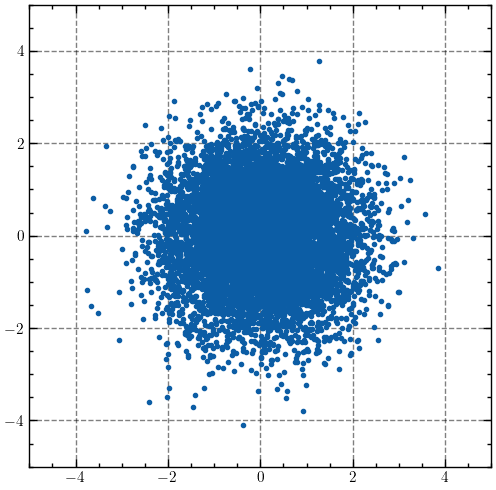

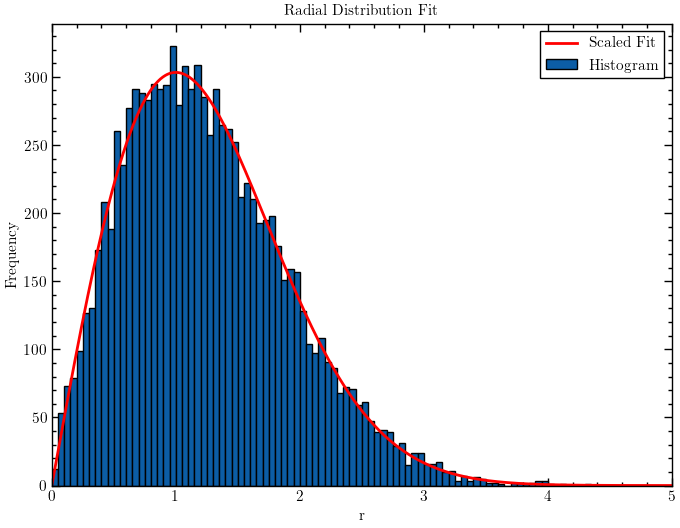

In [60]:
# Step 1: Generate 2D normally distributed points
size = 10000
sigma = 1
x = np.random.normal(0, sigma, size)
y = np.random.normal(0, sigma, size)

# Step 2: Scatter plot of the points
plt.scatter(x, y, marker='.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal')
plt.show()

# Step 3: Compute radial distances
r = np.sqrt(x**2 + y**2)

# Step 4: Compute histogram of r
bin_num = int(np.sqrt(size))
bin_edges = np.linspace(0, 5, bin_num+1)  # 50 bins from 0 to 5
heights, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
bin_width = bins[1] - bins[0]
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Step 5: Define the theoretical function f(r) = (r / sigma^2) * exp(-r^2 / (2 sigma^2))
def radial_distribution(r, sigma):
    return (r / sigma**2) * np.exp(-r**2 / (2 * sigma**2))

# Step 6: Compute theoretical values
r_f = np.linspace(0, 5, 1000)  # Smooth curve
f_r = radial_distribution(r_f, sigma)

# Step 7: Scale f(r) to match histogram
A = np.sum(heights * bin_width) #/ np.trapezoid(f_r, r_f)  # Scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

# Step 8: Plot histogram and scaled theoretical curve
plt.bar(bin_centers, heights, width=bin_width, edgecolor = 'k', label='Histogram')
plt.plot(r_f, f_r_scaled, color='r', linewidth=2, label='Scaled Fit')

# Step 9: Labels and legend
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Radial Distribution Fit')
plt.legend()
plt.grid()
plt.xlim(0,5)
plt.show()


In [ ]:
import numpy as np

# Function to generate random (r, theta) values
def generate_random_polar_coordinates(n, r_range, theta_ranges):
    r_values = np.random.randint(r_range[0], r_range[1] + 1, n)  # Random r values

    # Random theta values chosen from allowed ranges
    theta_values = []
    for _ in range(n):
        theta_range = theta_ranges[np.random.randint(len(theta_ranges))]  # Pick a random valid range
        theta_values.append(np.random.randint(theta_range[0], theta_range[1] + 1))

    return np.array(r_values), np.array(theta_values)

# Define parameters
params = [
    (10, (110, 119), [(0, 40), (140, 220), (320, 360)]),
    (5, (120, 129), [(0, 40), (140, 220), (320, 360)]),
    (3, (130, 139), [(0, 40), (140, 220), (320, 360)]),
    (2, (140, 149), [(0, 40), (140, 220), (320, 360)]),
    (1, (150, 159), [(0, 40), (140, 220), (320, 360)]),
    (1, (160, 169), [(0, 40), (140, 220), (320, 360)]),
]

# Generate and store results
r_list, theta_list = [], []
for n, r_range, theta_ranges in params:
    r_vals, theta_vals = generate_random_polar_coordinates(n, r_range, theta_ranges)
    r_list.extend(r_vals)
    theta_list.extend(theta_vals)

# Convert to numpy arrays
r_list = np.array(r_list)
theta_list = np.array(theta_list)

# Print results
for r, theta in zip(r_list, theta_list):
    # print(f"r = {r}, theta = {theta}")
    print(f'{r},{theta},')

117,165,
112,20,
111,5,
114,339,
111,208,
113,2,
115,18,
115,212,
114,351,
116,342,
129,2,
128,335,
120,322,
125,351,
126,194,
137,12,
138,349,
138,186,
144,32,
140,25,
159,192,
168,161,


In [50]:
print(target_file)
target_file['r'] = target_file['r'].astype(int)
target_file['theta'] = target_file['theta'].astype(int)
# Sort by theta in ascending order
target_file = target_file.sort_values(by='r')

# Iterate over rows using `.iterrows()`
print('r,theta')
for _, row in target_file.iterrows():
    print(f'{round(row['r'])},{round(row['theta'])}')


       r  theta  Unnamed: 2
0     21      0         NaN
1     27      0         NaN
2     27      1         NaN
3     50      1         NaN
4     67      1         NaN
..   ...    ...         ...
229  107    352         NaN
230   80    355         NaN
231   38    356         NaN
232   53    356         NaN
233   58    382         NaN

[234 rows x 3 columns]
r,theta
4,105
4,281
6,60
7,76
8,300
8,15
11,345
11,292
12,165
13,105
14,132
15,18
16,56
18,98
21,82
21,253
21,0
22,317
23,331
23,99
23,164
25,151
25,181
26,80
27,143
27,345
27,0
27,1
28,260
28,329
29,215
29,344
29,100
29,301
30,218
30,323
30,33
31,268
32,308
32,261
33,189
35,194
35,193
35,94
35,271
35,102
36,211
36,161
36,299
36,106
37,83
37,50
37,310
37,40
37,9
38,162
38,356
39,59
40,115
40,283
40,230
41,256
41,50
41,53
42,102
42,213
42,184
43,333
43,139
44,247
44,93
44,182
45,57
45,54
45,340
47,94
47,86
47,97
47,169
50,212
50,333
50,1
51,62
51,30
51,163
53,123
53,92
53,101
53,12
53,356
54,154
54,217
54,82
54,105
55,119
55,102
56,2

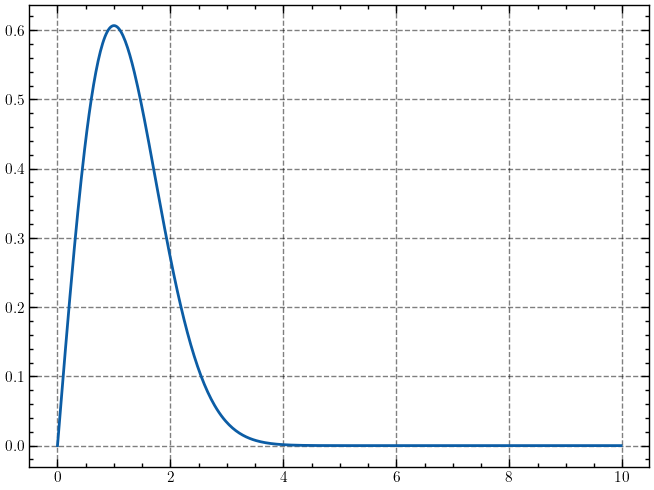

In [ ]:
dr = 0.02
r = np.arange(0,10,dr)
f = radial_distribution(r,sigma=1)
F = np.cumsum(f)*dr
plt.plot(r,f)
plt.plot(r,F)
plt.show()